In [3]:
path = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ML_1647449098/' #Averaged
#path = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ML_1647513928/' #single

In [50]:
import pandas as pd
df = pd.read_pickle(path+'predictions.pkl')

#Create some new columns for the errors
df['error_ERA'] = df.MODIS_LST - df.t2m
df['error_ERA_abs'] = abs(df.MODIS_LST - df.t2m)

df['error_NN'] = df.MODIS_LST - df.predictions
df['error_NN_abs'] = abs(df.MODIS_LST - df.predictions)

#Surface some useful numbers
print('Absolute error:')
print('--------------------------------')
print("Mean, Median error from NN model:",df.error_NN_abs.mean(), df.error_NN_abs.median())
print("Mean, Median error from ERA5:    ", df.error_ERA_abs.mean(), df.error_ERA_abs.median())

print('Biased error:')
print('--------------------------------')
print("Mean, Median bias from NN model:",df.error_NN.mean(), df.error_NN.median())
print("Mean, Median bias from ERA5:    ", df.error_ERA.mean(), df.error_ERA.median())

Absolute error:
--------------------------------
Mean, Median error from NN model: 3.331174 2.5567932
Mean, Median error from ERA5:     6.8367443 5.0725403
Biased error:
--------------------------------
Mean, Median bias from NN model: 0.21679911 0.26815796
Mean, Median bias from ERA5:     4.656218 3.462738


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt


def error_plot(df,x,grain):
    
    """
    Plotting function.
    df: data to plot
    x: What variable do you want the x-axis to be?
    grain: Precision of the x axis e.g. days. If int, then decimal precision
    relative: Boolean. Plot relative error or absolute error
    """

    
    
    
    
    #Some new columns used for plotting
    
    
    #Setup the x variable to plot.
    if x == 'time':
        df["X"] = df[x].dt.to_period(grain).dt.to_timestamp()
    else:
        df["X"] = df[x].round(grain) # Can also use .apply(lambda x: custom_round(x, base=2))
    
        
    #Group by
    df_plot = df.groupby(['X'],as_index=False).mean()
    
     #Setup plot env
    h,w = 20,20

    sns.set_theme(context='talk', 
                  style='ticks', 
                  palette='deep',
                  rc={'figure.figsize':(h,w)}
                  )

    
    #Figure
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(h,w))
    
    #Plot
    p = sns.lineplot(data=df_plot, x='X', y='error_NN_abs',ax=ax1,markers=True,label='NN')
    p = sns.lineplot(data=df_plot, x='X', y='error_ERA_abs',ax=ax1,markers=True,label='ERA')
    
    #Config
    ax1.set_xlabel('time', fontsize = 20)
    ax1.set_ylabel('Error [K]', fontsize = 20)


    

    #Other config
    ax1.legend().set_title(None)
    

    
    
    
# def plot_map(df,z,y_lower,y_upper):
    
#     #Get all data as vectors
#     x = df.longitude_ERA
#     y = df.latitude_ERA
#     z1 = df[z]
    
#     #Scatter plot it
#     fig = plt.figure(figsize=(30, 20))
#     sc = plt.scatter(x, y,
#            linewidths=1, alpha=.7,
#            s = 1,
#            c=z1,cmap='viridis')

#     cbar = plt.colorbar(sc)
#     print(cbar)
#     print(cbar.vmin, cbar.vmax)
#     cbar.ax.set_ylabel('X', rotation=270,fontsize = 12)
#     plt.clim(y_lower,y_upper)
#     plt.show()
    
    
    
import matplotlib.colors as mc
import matplotlib.colorbar as cb  
def plot_mapV2(df,z,vmin,vmax):
    
    #Get all data as vectors
    x = df.longitude_ERA
    y = df.latitude_ERA
    z1 = df[z]
    
    #Scatter plot it
    # init the figure
    fig,[ax,cax] = plt.subplots(1,2, gridspec_kw={"width_ratios":[50,1]},figsize=(30, 20))

    cmap = plt.cm.coolwarm
    norm = mc.Normalize(vmin=-10, vmax=10)

    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
    
    
    sc = ax.scatter(x, y,
               s=1,
               c=cmap(norm(z1)),
               linewidths=1, alpha=.7
               )

    plt.show()

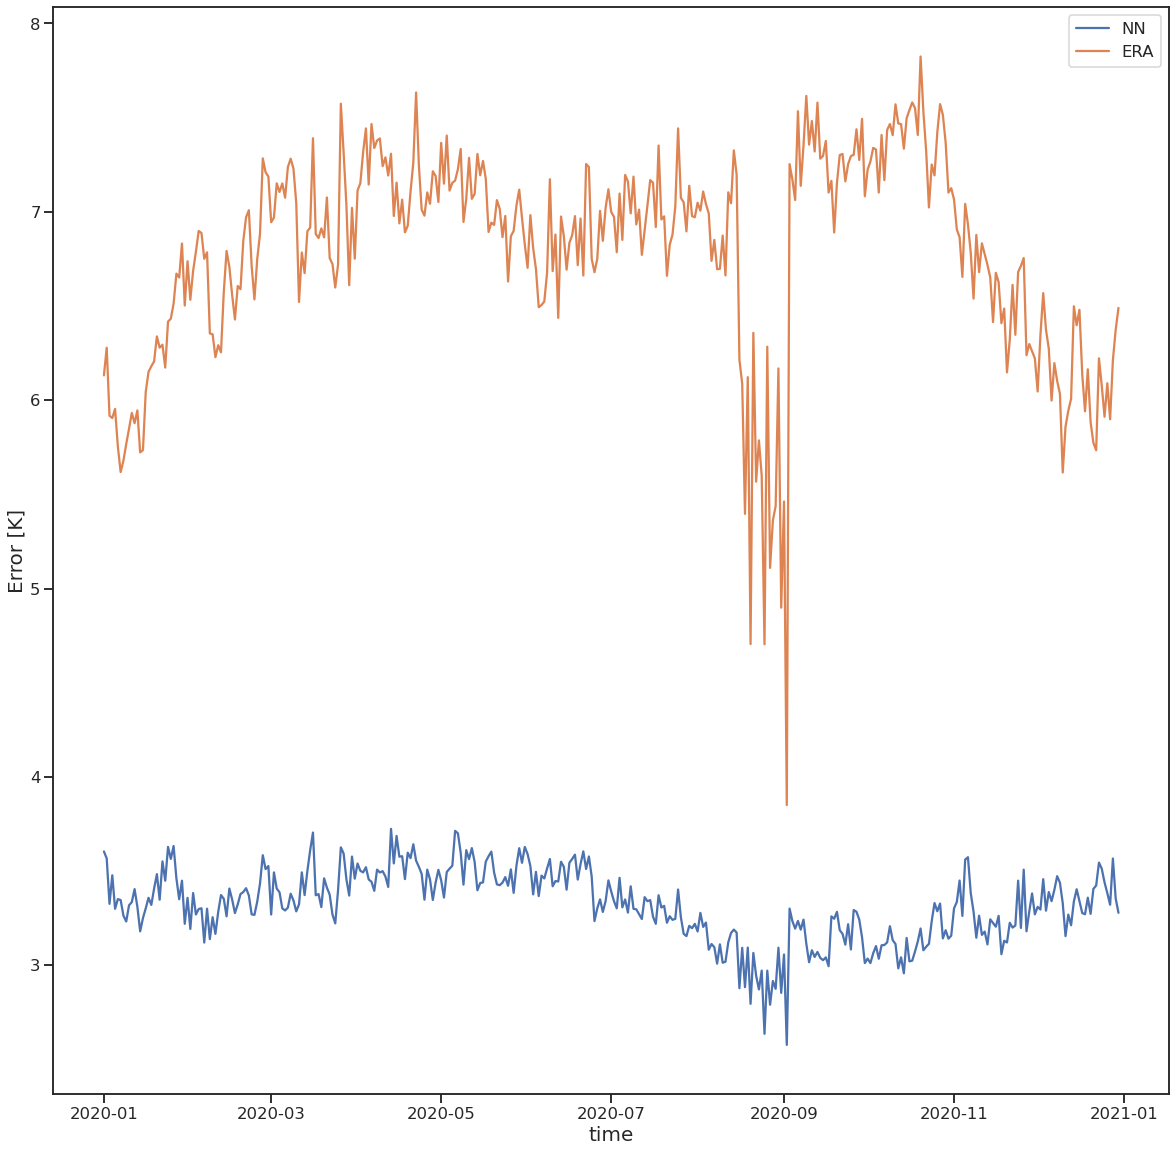

In [52]:
error_plot(df,'time','D')

In [55]:
%%time
#Group by lat/long i.e. average over time
ds_map = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


CPU times: user 9.16 s, sys: 2 s, total: 11.2 s
Wall time: 11.2 s


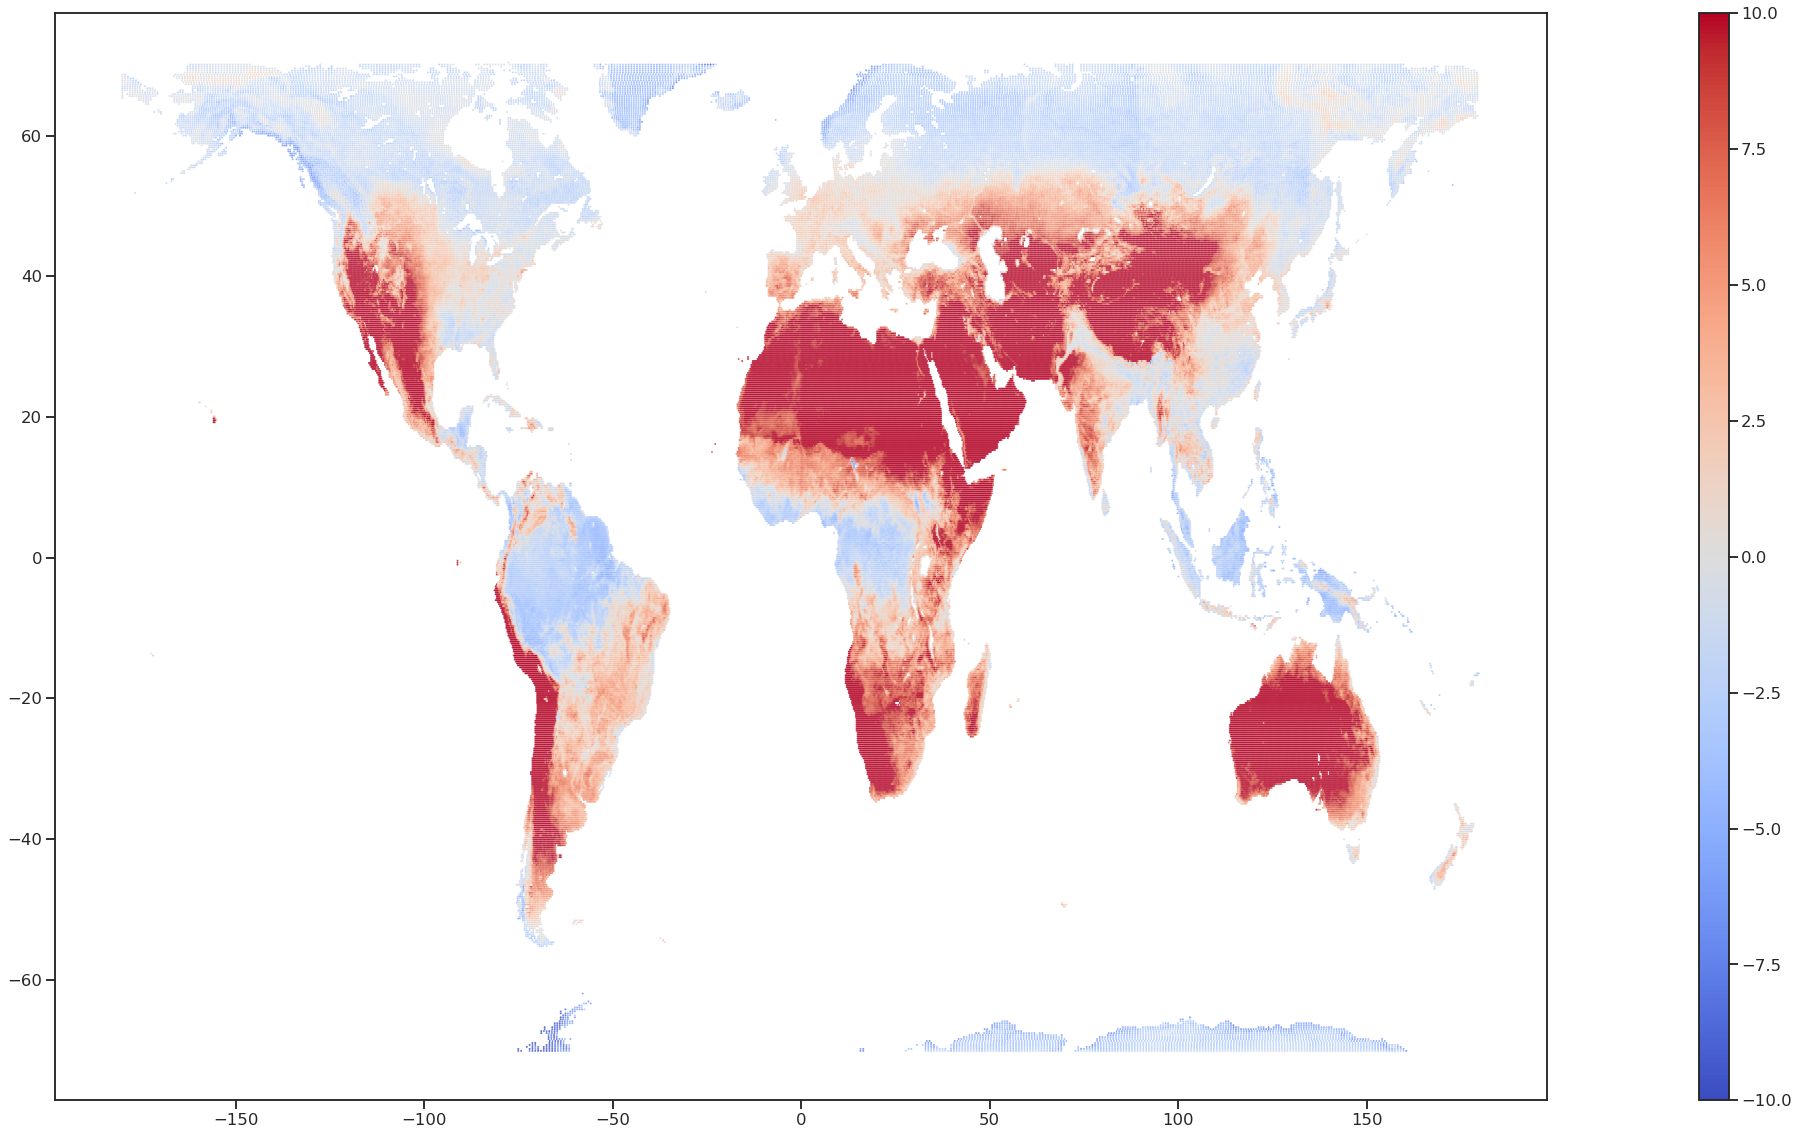

In [28]:
plot_map(ds_map,'error_ERA',0,10)



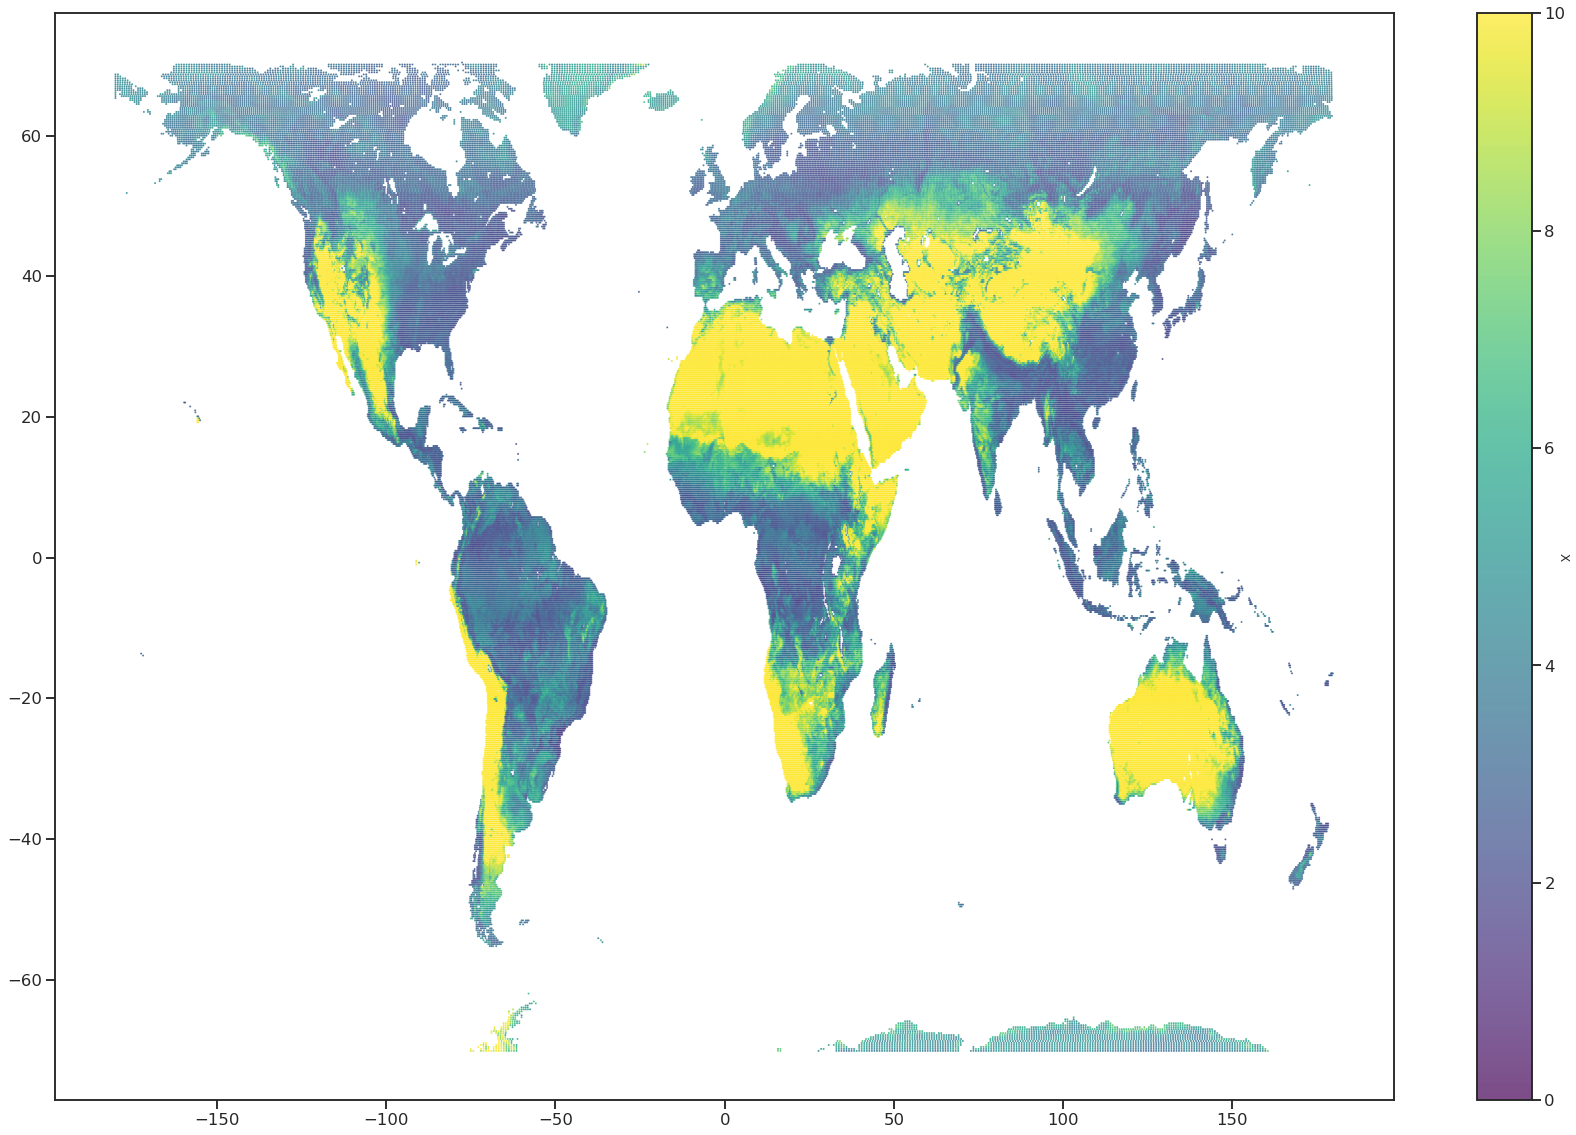

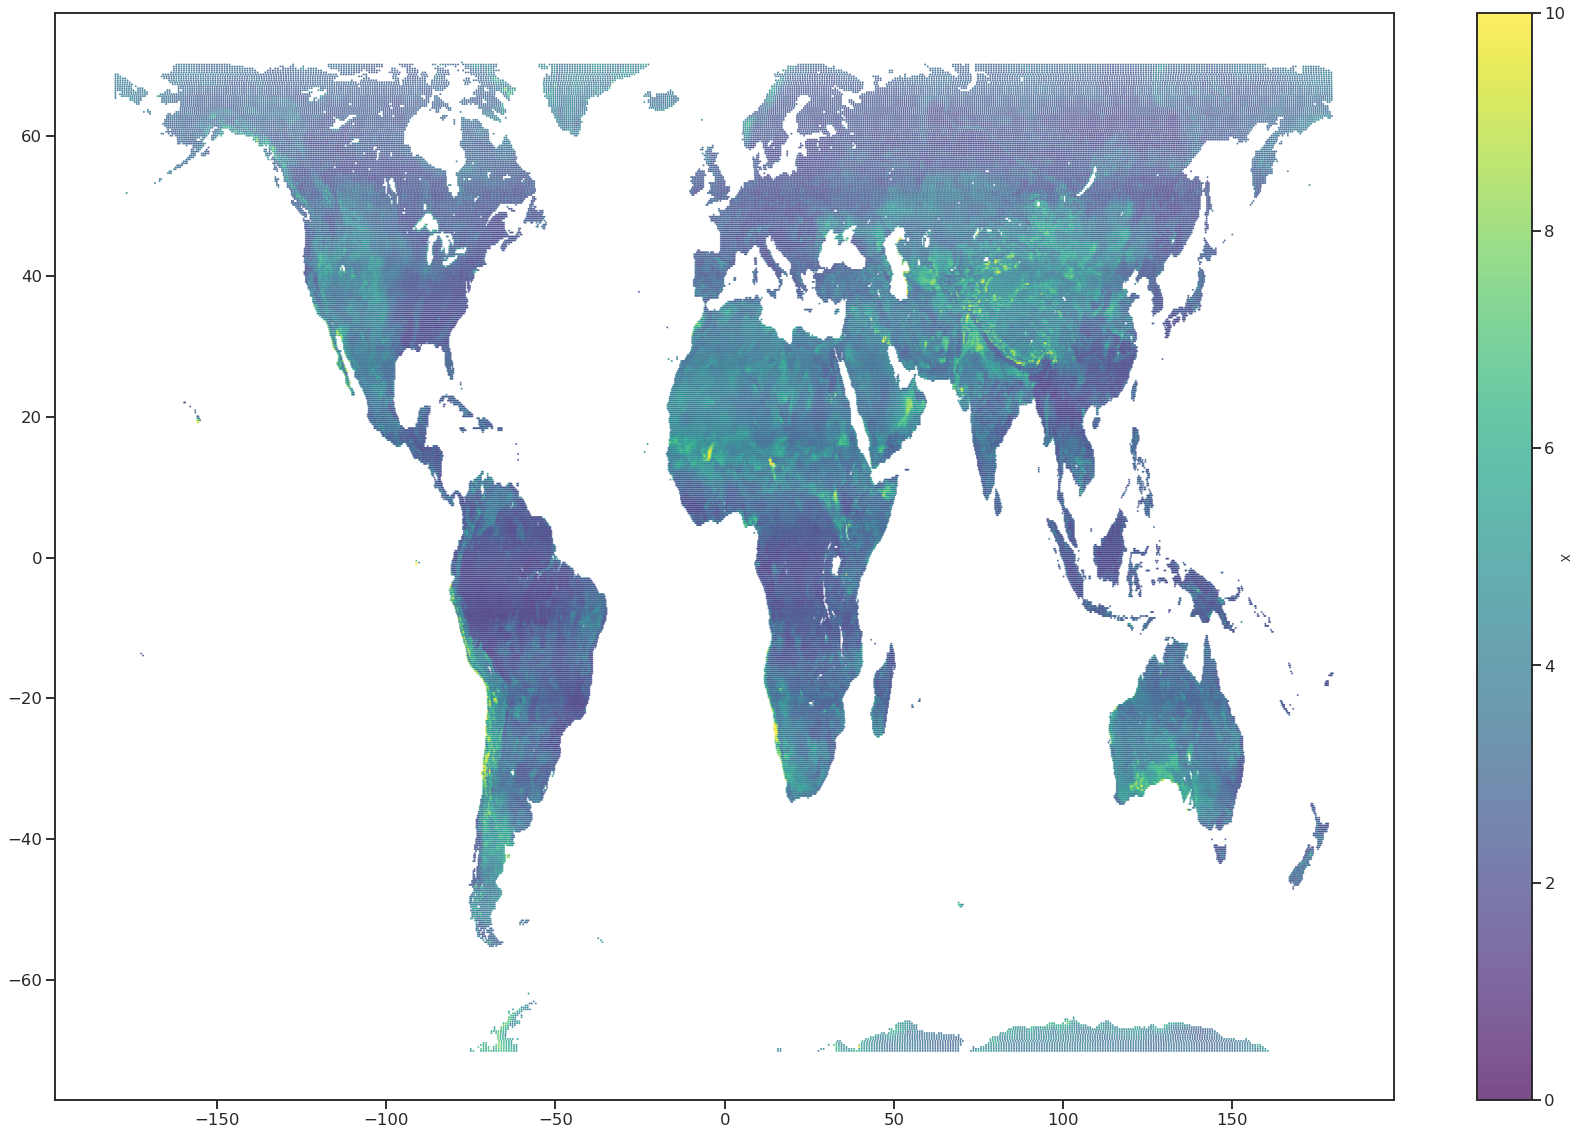

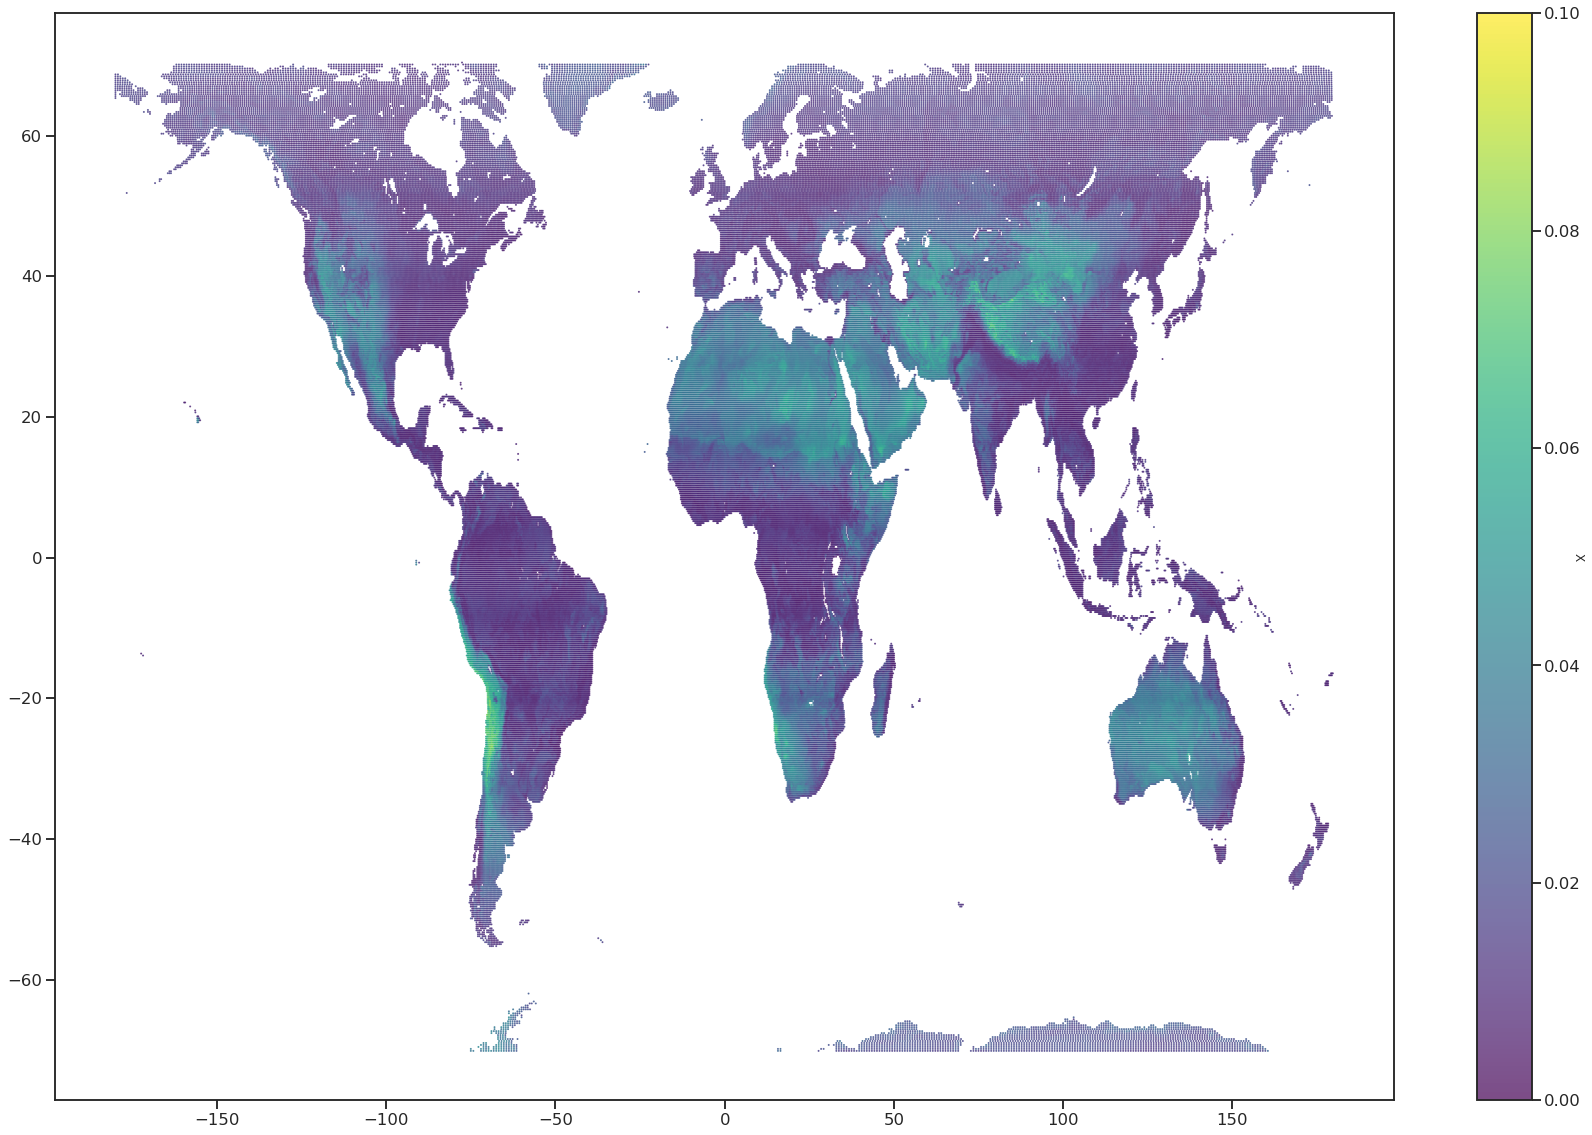

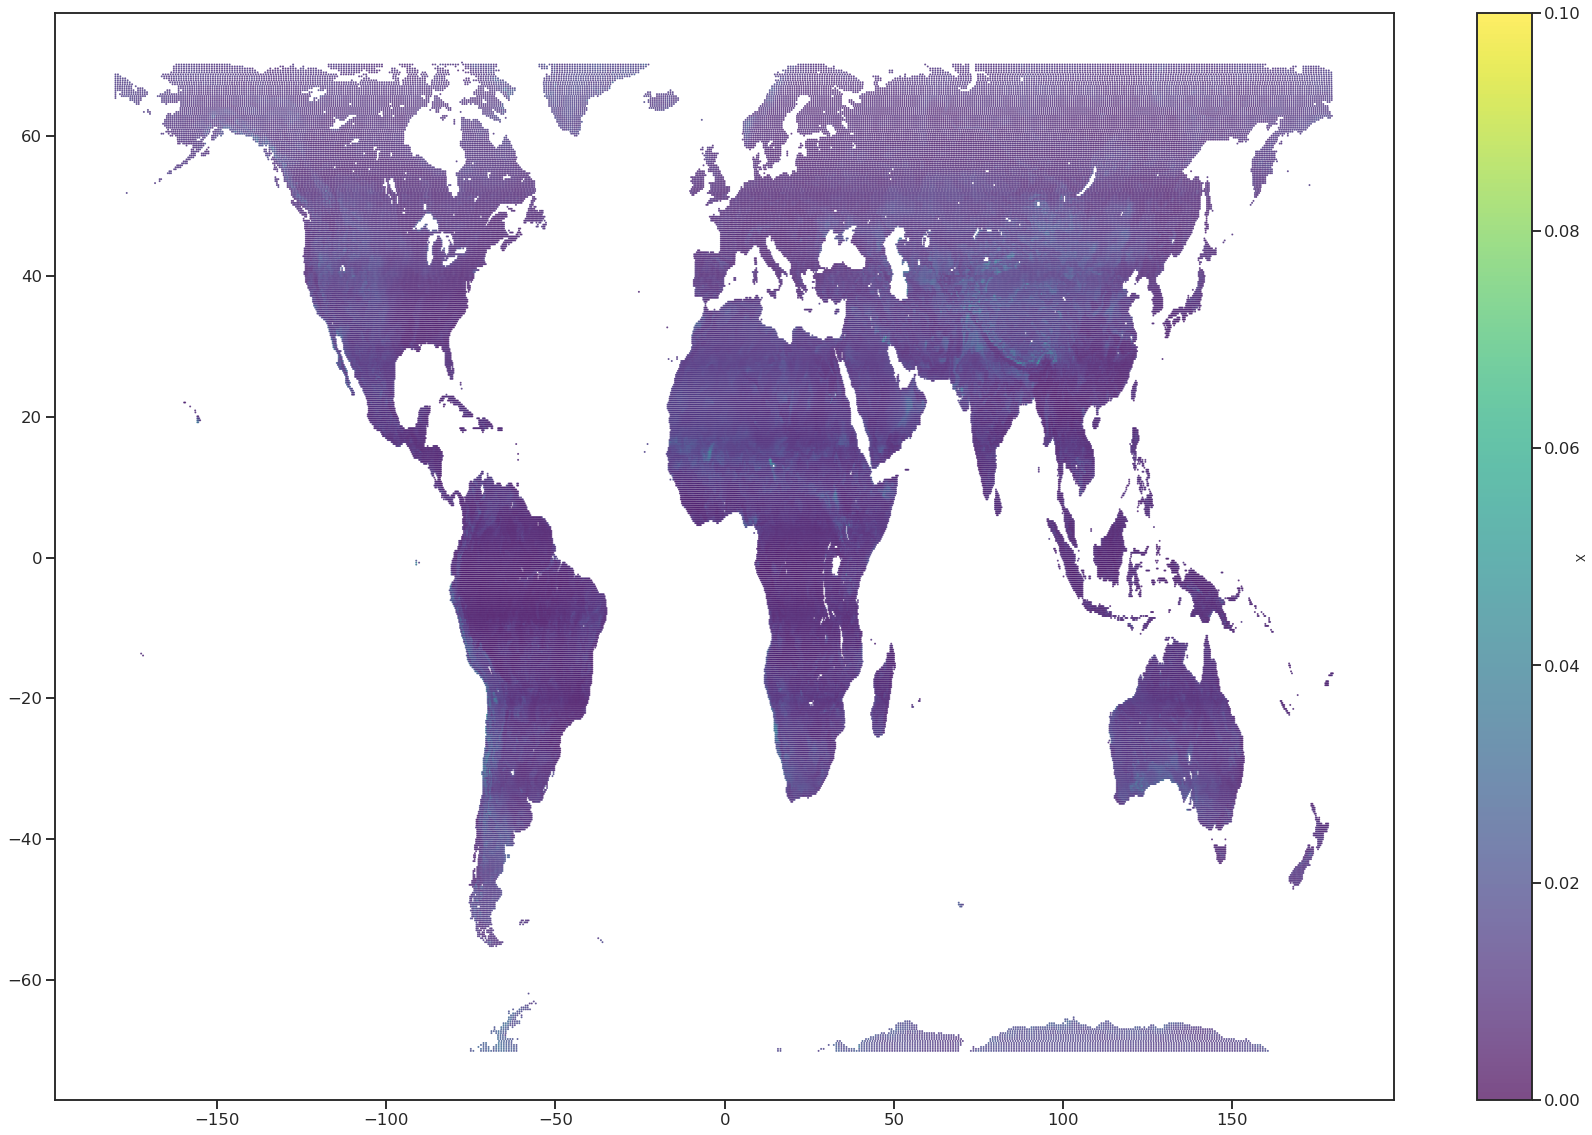

In [67]:
plot_map(ds_map,'error_ERA',0,10)
plot_map(ds_map,'error_NN',0,10)
plot_map(ds_map,'error_ERA_rel',0,0.1)
plot_map(ds_map,'error_NN_rel',0,0.1)

# Appendix


## A1 Model Training

We can also look at how the model trained:

In [70]:
import json
with open(path+'history.json') as f:
    d = json.load(f)


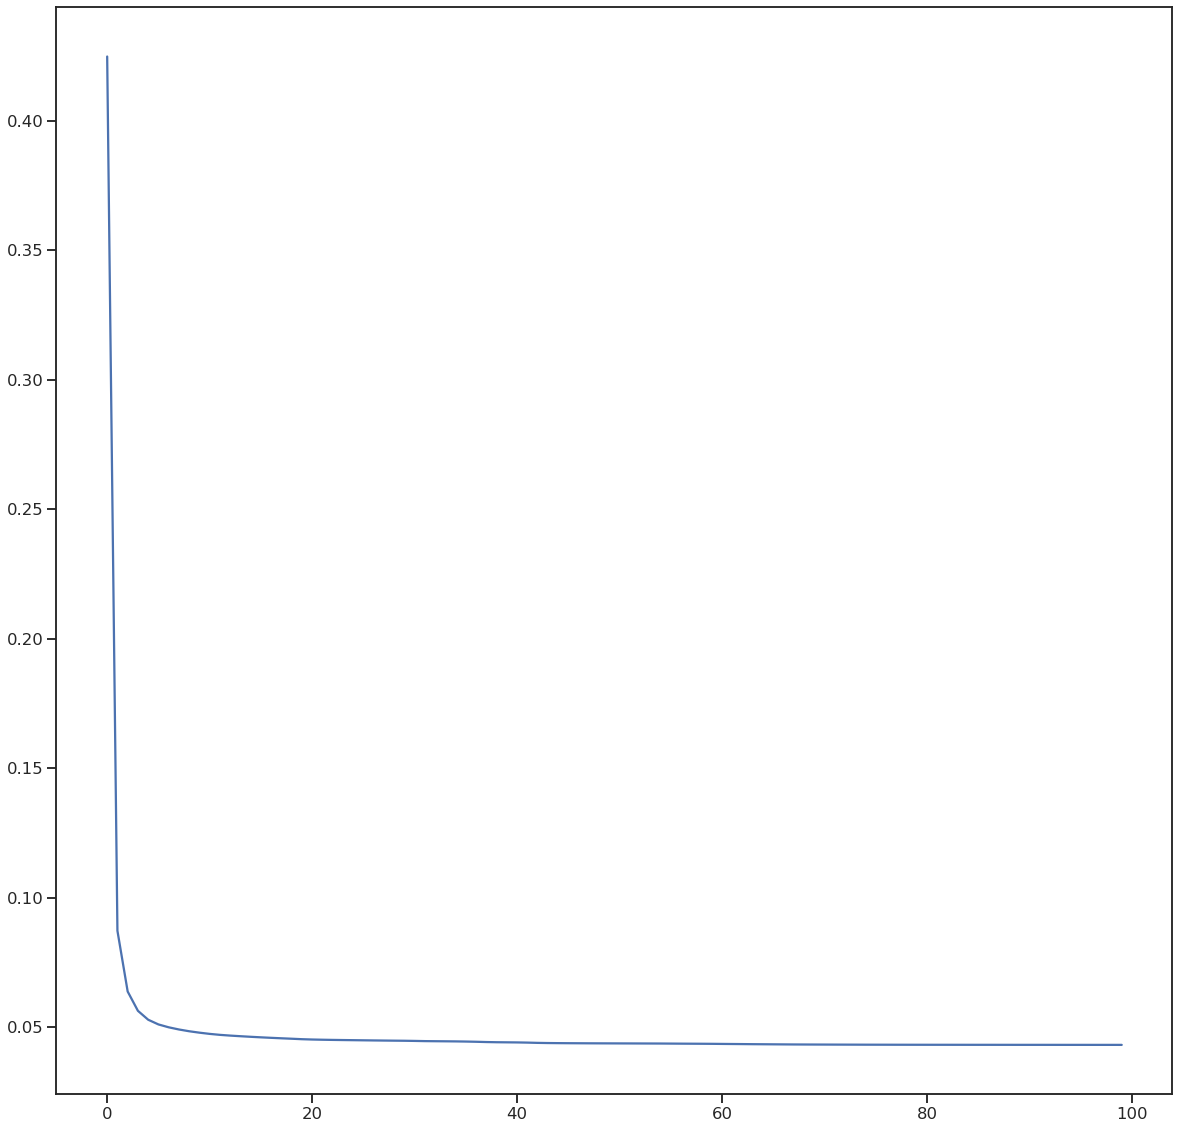

In [75]:
import numpy as np
y = d['loss']
x = np.arange(len(y))

fig = plt.figure(figsize=(20, 20))
plt.plot(x,y)
#plt.xscale('log')
#plt.yscale('log')

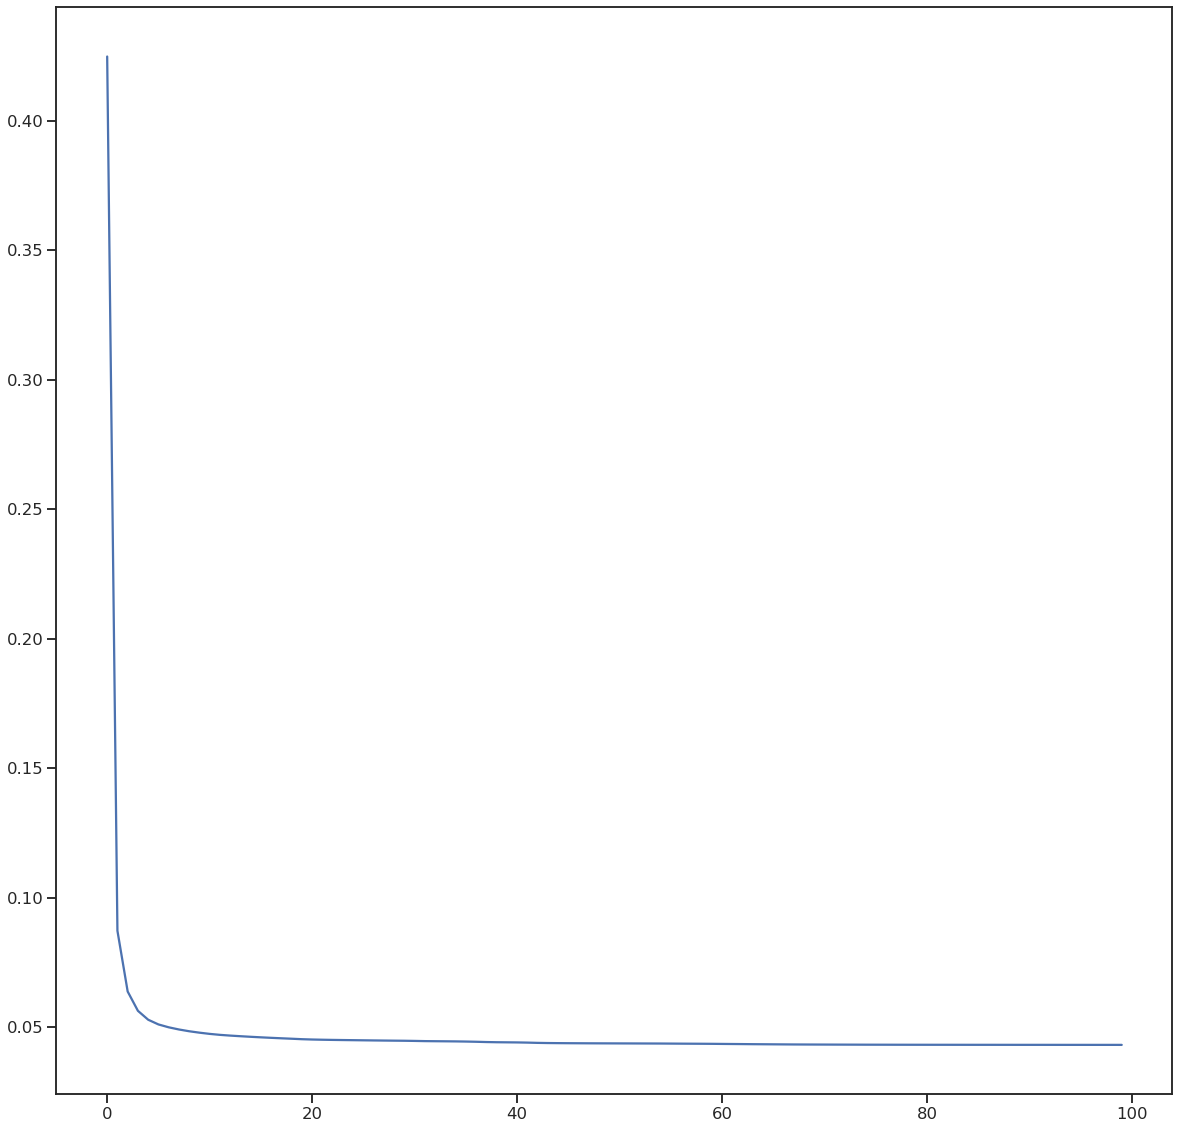

In [76]:
path1 = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ML_1647513928/' #single
with open(path+'history.json') as f:
    d = json.load(f)

import numpy as np
y = d['loss']
x = np.arange(len(y))

fig = plt.figure(figsize=(20, 20))
plt.plot(x,y)


## A2 Time slice

In [77]:
df_tmp = df.copy()

In [86]:
df_tmp = df.copy()
df_tmp['error_ERA'] = abs(df_tmp.MODIS_LST - df_tmp.t2m)
df_tmp['error_NN'] = abs(df_tmp.MODIS_LST - df_tmp.predictions)
df_tmp['error_ERA_rel'] = abs(df_tmp.MODIS_LST - df_tmp.t2m) / df_tmp.MODIS_LST
df_tmp['error_NN_rel'] = abs(df_tmp.MODIS_LST - df_tmp.predictions) / df_tmp.MODIS_LST
df["time_daily"] = df['time'].dt.to_period('D').dt.to_timestamp()
ds_map = df_tmp.groupby(['latitude_ERA', 'longitude_ERA','time_daily'],as_index=False).mean()

In [82]:
all_days = np.unique(df["time_daily"])

In [84]:
ti = all_days[3]

In [85]:
ti

numpy.datetime64('2020-01-04T00:00:00.000000000')

In [87]:
%matplotlib notebook

In [88]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [90]:
%matplotlib widget

In [89]:
fig, ax = plt.subplots()
line, = ax.plot([])     # A tuple unpacking to unpack the only plot
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

<IPython.core.display.Javascript object>

(-1.1, 1.1)

In [30]:
import xarray as xr


In [38]:
sat_xr.data.count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [43]:
import numpy as np
sat_xr = xr.open_dataarray(f'/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/MODIS/aquaDay_errorGTE03K_04km_2020-06-25.tif',engine="rasterio")
np.count_nonzero(~np.isnan(sat_xr.data)) / 1e6

11.216495

In [44]:
import numpy as np
sat_xr = xr.open_dataarray(f'/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/MODIS/aquaDay_errorGTE03K_04km_2020-08-25.tif',engine="rasterio")
np.count_nonzero(~np.isnan(sat_xr.data)) / 1e6

2.768851

In [54]:
sat_xr

<xarray.DataArray 'band_data' (band: 1, y: 5400, x: 10800)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 180.0 180.0
  * y            (y) float64 89.98 89.95 89.92 89.88 ... -89.92 -89.95 -89.98
    spatial_ref  int64 ...
Attributes:
    long_name:  LST_Day_1km

In [ ]:
f = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/ERA_skin/sfc_skin_unstructured_2018_01.grib'
ds = xr.open_dataset(f,engine='cfgrib',filter_by_keys={'typeOfLevel': 'surface'})

Ignoring index file '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/ERA_skin/sfc_skin_unstructured_2018_01.grib.923a8.idx' incompatible with GRIB file
